In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [14]:
df = pd.read_csv('boston.csv')

In [15]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.rename(columns={'TOANLOGICPHANTICH' : 'LOGIC',
                    'GIAIQUYETVANDE': 'UNGXU',
                    'DINHHUONGNGHENGHIEP' : 'DINHHUONG'}, inplace = True)
df

,NGONNGU,LOGIC,UNGXU,DINHHUONG
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No
...,...,...,...,...
95,5.25,1.50,6.25,Yes
96,5.25,3.75,4.75,No
97,7.00,8.00,4.00,Yes
98,5.00,3.50,5.50,No


In [ ]:
# Do biến DINH HUỐNG là dạng categorical values (định tính) nên cần 4 trong bài này biến ĐỊNH HƯƠNG chỉ có 2 gia tri MolYes nen ta đã đã

# A nhưng nếu như số lượng giá trị nhiều hơn 2 thì ta còn dùng PHOE 1 biến đổi về dạng một vector số tương ứng
dinhhuong = pd.get_dummies(df[ 'DINHHUONG'], drop_first=True)
df.drop('DINHHUONG', axis=1, inplace=True)
df = pd.concat([df, dinhhuong], axis=1)
df.head(5)

,NGONNGU,LOGIC,UNGXU,Yes
0,3.25,3.25,4.50,False
1,6.00,4.00,3.50,True
2,5.00,6.75,4.00,False
3,4.25,4.25,5.25,False
4,4.25,4.50,5.00,False


In [19]:
X = df['LSTAT'].values #input
y = df['MEDV'].values #output
#Chia tách ra training và testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
y_train

array([25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5, 43.5, 23.6, 11. ,
       33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3, 14.9, 26.6, 19.9,
       24.8, 21.2, 23.9, 20.6, 23.1, 28. , 20. , 23.1, 25. ,  9.7, 23.9,
       36.1, 13.4, 12.7, 39.8, 10.4, 20.6, 17.8, 19.5, 23.7, 28.5, 24.3,
       23.8, 19.1, 28.4, 20.5, 33.8, 14.5, 20.4, 16. , 13.3, 30.8, 27.5,
       24.4, 24.4, 25.1, 43.8, 21.9, 26.2, 14.2, 20.8, 20.1, 23.1, 13.1,
       16.2, 24.8, 20.2, 22.5, 14.8, 28.7, 20.1, 23.4, 32. , 19.1, 50. ,
       20.9, 21.7, 22. , 17.2, 30.3, 12.3, 21.4, 20.5, 35.2, 19.6, 22. ,
       21.7, 14.1, 21.1, 15. , 11.9, 20. , 41.3, 18.7, 50. , 50. , 18.4,
       17.9, 28.1, 16.1, 17.2, 28.6, 23.6, 20.4, 19.6, 18.8, 22.6, 17.7,
       30.5, 18.2, 20.6, 24.4, 17.3, 13.3, 22.8, 20.5, 21.2, 18.8, 18.9,
       18.2, 23.1, 32.7, 24. , 10.2, 19.5, 33.1, 13.4, 15.2, 24.8, 24.3,
        9.5, 24.2, 18.5, 44. , 50. , 24.7, 21.5,  8.4, 21.8, 50. , 23.8,
       32.4, 24.4, 17.6, 29.8,  9.6, 16.7, 13.8, 32

In [22]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 5.81  6.86 30.81 12.34 17.16  5.5  13.15  7.67  3.16  9.04 21.52  6.47
  7.79  2.87  9.74 11.69  1.98  7.44  9.97 18.71  4.84 14.19  9.51 12.92
  8.58  9.08 14.69  5.29 14.15 10.36  6.21 25.68  7.22  6.93 26.82 19.01
  7.56 17.21  5.57 18.46 18.66  6.36  3.33  9.16  7.2  21.32  6.65 17.93
  9.59 19.88  8.26 14.44 21.24  4.32  7.12  7.73 14.66  9.54  3.57  5.29
  6.56 15.7  14.1  12.93  6.36 23.69 17.19  6.72 10.29 18.06 17.28  5.7
 14.76  7.54  6.68 12.03  1.73  8.79 21.46  8.2  21.22  8.61 24.56 14.81
 10.15  6.58  9.22 14.37 15.71 18.13 13.   13.44  7.88 14.7   4.59  9.29
  4.45  8.88 16.59 34.37  9.38 17.27 12.67  6.27  5.5   7.7  12.26 17.58
  9.64 14.65  4.69 10.26 13.34  5.9  25.41 21.32 10.16  9.43 10.58 16.21
 17.1  11.28  6.58  5.49  4.98 21.78 16.47  4.16 17.44 18.06  6.07 11.65
 24.08  6.72 11.74  3.11  3.16 10.13 14.1  34.02 12.01  3.32 12.14  3.53
 10.97 12.5   4.56 18.05 18.68 27.8   2.98 12.03 19.77  5.89 16.22 10.11
  8.93  7.85 12.43  5.33 26.64 14.64  3.76 19.78  3.92  9.42 26.4   8.43
  6.36 18.14  6.48 15.12  3.59  6.43  6.59  9.55 11.45 17.09 26.77 23.98
 12.27 11.32  9.1  24.91  9.62 29.93 27.71  6.19 22.11 25.79  9.93 12.8
  7.14 37.97  4.81 10.74  7.01 29.05 30.81 20.62 11.48 18.35  9.68  9.5
 27.38 12.64  8.05 17.6  10.21  4.86  6.29 10.5  17.73  7.39 13.83  9.52
  9.97  4.56 14.59 16.3  13.98 10.87 17.31  4.74 12.04 16.03 16.94 15.17
 19.52  5.25  9.69  5.77 17.15 20.32 34.77 22.88  9.45  4.21 10.45  7.19
 15.37 23.6  14.43 26.45 14.8  10.11 12.79  4.38  6.62  7.79 14.36  4.82
 36.98  8.05 13.44  9.71 12.6   4.5   8.51  3.26 13.15 10.59  5.03 24.16
 28.32  3.11 12.12 10.56 13.11 20.45 13.65 11.34 17.27 11.38  3.95  9.5
 30.62 12.67 11.41 16.74 21.02 23.98  7.83  8.94  4.45 10.27 11.25 15.1
 21.45 23.79  4.03  5.28  5.91  3.54 13.99  6.9   5.68  3.73  6.87  5.68
 13.28 16.23  8.67  5.1   6.78  5.99  5.19 23.97  8.44  7.37 26.42 23.29
 14.79  7.6  16.9   3.7   7.51 21.14 15.02 17.6  21.08  4.85 27.26  2.97
 10.45 14.13 12.33 15.79  3.01 18.76  3.13 13.33 16.51  4.08  8.05  8.47
 15.84  9.53 15.55  9.8   4.54 14.81 11.97  7.44  3.76  2.94 13.22 16.2
 22.98 31.99 13.35 22.6  14.27 19.69 15.76 16.29 13.51  8.1  23.09 18.33
 30.63  9.14  7.9  18.72 15.94 12.73 19.15 14.33 34.41 12.86  7.79 12.4
 12.87  9.47 13.09 13.45 30.59 20.08 16.14  3.53 17.12 18.13 20.31 13.27
  6.57  6.05  6.92  4.59 17.11  4.73  9.88 16.42 18.34 29.29 18.13  8.01
 15.03  3.81 15.17  9.25  5.52 19.37 10.88  8.77].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import pickle
pickle.dump(classifier,open('logisticregression.sav','wb'))

loaded_model= pickle.load(open('logisticregression.sav','rb'))

vNN=float(input("nhap nn :"))
vlogic=float(input("nhap lg :"))
vUX=float(input("nhap ux :"))

y_pred=loaded_model.predict([[vNN,vlogic,vUX]])
print('Dự báo định hướng:'+str(y_pred[0]))

ValueError: could not convert string to float: '\\'

Z =-1.2971+0.3197+NN-0.043*LG+0.0289*UX
f(z) = 1/(1+e^-Z)
sigmod
f(z) = threshold = 0.5

In [ ]:
X_test

array([[3.75, 4.5 , 4.25],
       [4.75, 2.  , 5.5 ],
       [3.5 , 4.75, 3.5 ],
       [5.75, 3.5 , 4.25],
       [4.75, 6.5 , 8.  ],
       [2.75, 3.75, 5.  ],
       [2.25, 3.5 , 5.  ],
       [3.75, 4.  , 3.5 ],
       [2.  , 5.25, 3.5 ],
       [4.  , 4.75, 5.5 ],
       [5.  , 4.  , 6.75],
       [2.5 , 3.5 , 6.5 ],
       [5.25, 4.5 , 4.75],
       [4.25, 2.75, 3.25],
       [5.  , 3.5 , 5.5 ],
       [1.5 , 4.5 , 5.5 ],
       [4.75, 4.75, 4.5 ],
       [6.5 , 4.5 , 8.  ],
       [2.25, 4.  , 4.25],
       [2.5 , 2.75, 5.5 ]])

In [ ]:
#Default threshold is 0.5
y_pred_test = classifier.predict(X_test)
y_pred_test

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False])

In [ ]:
print(classifier.predict_proba(X_test))
#0.5421 Giá trị mô hình hồi quy tuyến tính là z
#0.4578 Giá trị mô hình sau khi đi qua hàm 1(1+e^(-Z))

[[0.54215376 0.45784624]
 [0.42686728 0.57313272]
 [0.56989436 0.43010564]
 [0.37434035 0.62565965]
 [0.45685782 0.54314218]
 [0.60701717 0.39298283]
 [0.64196612 0.35803388]
 [0.54218784 0.45781216]
 [0.68624869 0.31375131]
 [0.51592045 0.48407955]
 [0.41956957 0.58043043]
 [0.61315482 0.38684518]
 [0.41943042 0.58056958]
 [0.49065667 0.50934333]
 [0.42312774 0.57687226]
 [0.70106665 0.29893335]
 [0.46326149 0.53673851]
 [0.30601715 0.69398285]
 [0.65184076 0.34815924]
 [0.6123461  0.3876539 ]]


In [ ]:
print('Prediction with 0.9: ')
y_pred_test_new_threshold = (classifier.predict_proba(X_test)[:,1] >= 0.9).astype(int)
y_pred_test_new_threshold

Prediction with 0.9: 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Default threshold = 0.5
result = pd.DataFrame ({'Actual': y_test.flatten(), 'Predicted': y_pred_test})
result

,Actual,Predicted
0,True,False
1,False,True
2,True,False
3,True,True
4,False,True
5,False,False
6,False,False
7,True,False
8,False,False
9,True,False


Kết quả dự báo chính xác là: 35%
(0 0) (1 1)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.35

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
cf_matrix
#Giá trị
#TP (Actual = 1, Prediction = 1) = 2
#FP (Actual = 0, Prediction = 1) = 7
#FN (Actual = 1, Prediction = 0) = 6
#TN (Actual = 0, Prediction = 0) = 5

array([[5, 7],
       [6, 2]], dtype=int64)

TP + TN /(TP+TN+FP+FN)

Text(0.5, 23.52222222222222, 'Prediction label')

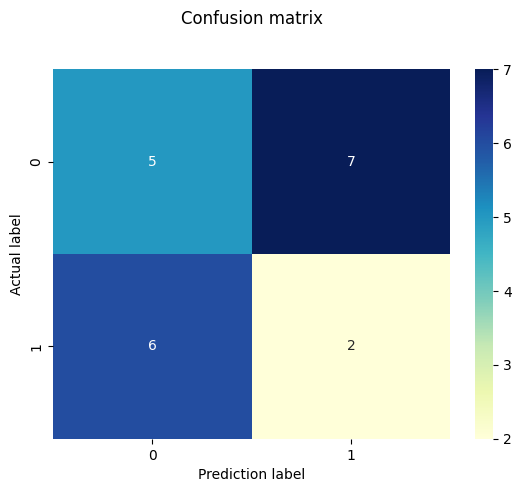

In [ ]:
sns.heatmap(pd.DataFrame(cf_matrix), annot = True, cmap="YlGnBu", fmt = 'g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

- Các độ đo đánh giá mô hình phân lớp
- N là số lượng mẫu = TP+FP+FN+TN
- TP,FP,FN,TN
- accuracy = (TP+TN)/(TP+FP+FN+TN)
- Precision = TP/(TP+FP)
- Recall = TP/(TP+FN)
- F1-Score = 2*Precision *Recall/(Precision+Recall)

In [ ]:
from sklearn.metrics import classification_report
target_names = ('Not oriented', 'Oriented')
print(classification_report(y_test, y_pred_test, target_names = target_names))

              precision    recall  f1-score   support

Not oriented       0.45      0.42      0.43        12
    Oriented       0.22      0.25      0.24         8

    accuracy                           0.35        20
   macro avg       0.34      0.33      0.34        20
weighted avg       0.36      0.35      0.35        20



In [ ]:
import pickle
pickle.dump(classifier,open('logisticregression.sav','wb'))

loaded_model= pickle.load(open('logisticregression.sav','rb'))

vNN=float(input("nhap nn :"))
vlogic=float(input("nhap lg :"))
vUX=float(input("nhap ux :"))

y_pred=loaded_model.predict([[vNN,vlogic,vUX]])
print('Dự báo định hướng:'+str(y_pred[0]))

Dự báo định hướng:False
